<a href="https://colab.research.google.com/github/ShvetsovEgor/ML/blob/main/%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8C%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%BE%D0%B3%D0%BE_%D0%B7%D1%80%D0%B5%D0%BD%D0%B8%D1%8F_%D0%A1%D0%B5%D0%BC%D0%B8%D0%BD%D0%B0%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Скачайте датасет cifar10, посмотрите на картинке, разделите выборки и обучите одну полносвязную архитектуру из прошлого домашнего задания. Используйте SparseCategoricalCrossentropy. Выведите summary модели, посмотрите на графики обучения, сделайте выводы.

In [1]:
import tensorflow as tf
from keras.utils import to_categorical

In [2]:
(train_images_full, train_labels_full), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images_full, test_images = train_images_full / 255.0, test_images / 255.0

In [3]:
print("Train size = %i, test_size = %i"%(len(train_images_full),len(test_images)))

Train size = 50000, test_size = 10000


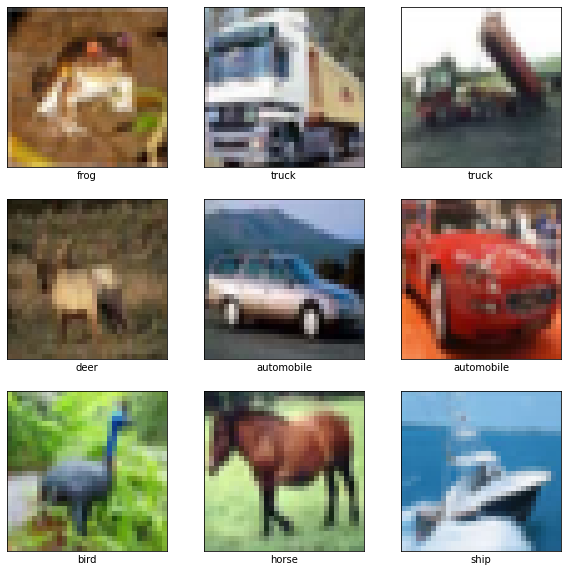

In [4]:
import matplotlib.pyplot as plt



class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels_full[i][0]])
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
val_size = 0.01

train_images, validation_images, train_labels, validation_labels = train_test_split(train_images_full, train_labels_full, test_size=val_size) 


In [6]:
batch_size = 512

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))  ### your code here
train_dataset = train_dataset.shuffle(buffer_size=1024, reshuffle_each_iteration=True)
train_dataset = train_dataset.batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels)) ### your code here
val_dataset = val_dataset.batch(batch_size)


In [7]:
input_shape = train_images.shape[-3:]

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)])

model.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_8 (Dense)             (None, 128)               393344    
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 10)                1290      
                                                                 
Total params: 395,146
Trainable params: 394,890
Non-trainable params: 256
_________________________________________________________________


In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


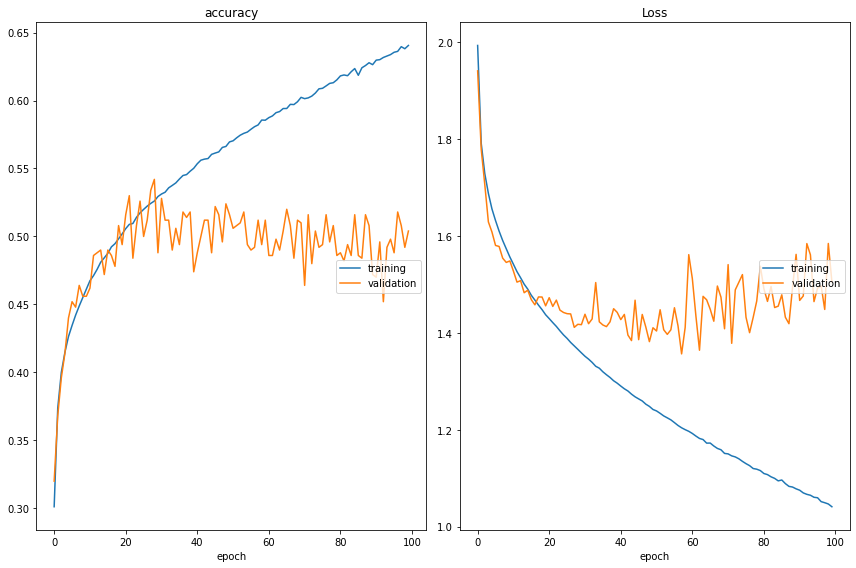

accuracy
	training         	 (min:    0.301, max:    0.641, cur:    0.641)
	validation       	 (min:    0.320, max:    0.542, cur:    0.504)
Loss
	training         	 (min:    1.041, max:    1.993, cur:    1.041)
	validation       	 (min:    1.357, max:    1.941, cur:    1.505)


In [ ]:
from livelossplot import PlotLossesKeras

model.fit(train_dataset, validation_data=val_dataset, epochs=100, callbacks=[PlotLossesKeras()], verbose=False)

In [ ]:
model_conv = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)])

model_conv.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

In [ ]:
model_conv.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               460928    
                                                                 
 batch_normalization_2 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 10)               

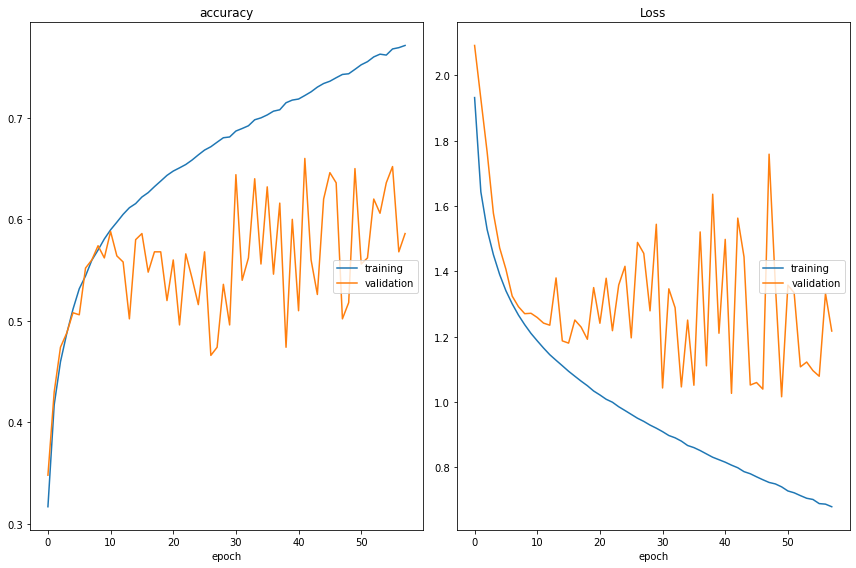

accuracy
	training         	 (min:    0.317, max:    0.771, cur:    0.771)
	validation       	 (min:    0.348, max:    0.660, cur:    0.586)
Loss
	training         	 (min:    0.680, max:    1.932, cur:    0.680)
	validation       	 (min:    1.016, max:    2.092, cur:    1.217)


KeyboardInterrupt: ignored

In [ ]:
from livelossplot import PlotLossesKeras
model_conv.fit(train_dataset, validation_data=val_dataset, epochs=100, callbacks=[PlotLossesKeras()], verbose=False)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


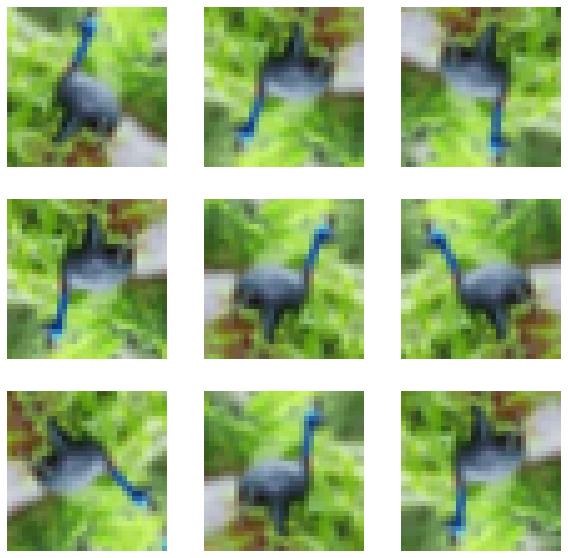

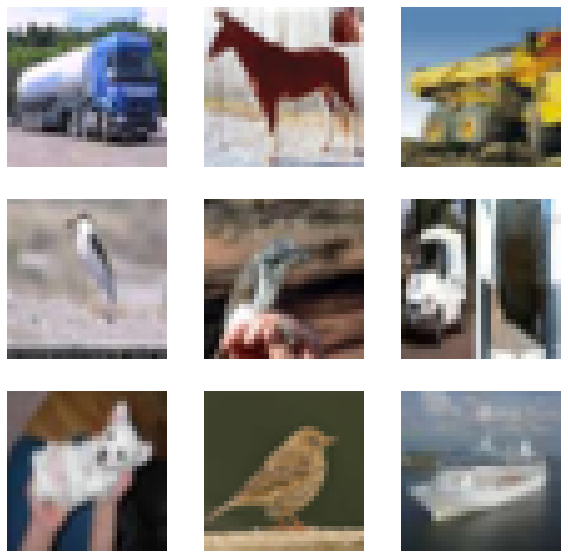

In [8]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  # layers.RandomRotation(0.1),
])

import numpy as np

augmented_train_dataset = train_dataset.map(
  lambda x, y: (data_augmentation(x, training=True), y))

data_augmentation_vis = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.1),
])

image = tf.cast(tf.expand_dims(train_images_full[6], 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
  augmented_image = data_augmentation_vis(image, training=True)
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")


sample_x, sample_y = next(iter(augmented_train_dataset))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(sample_x[i])
  plt.axis("off")

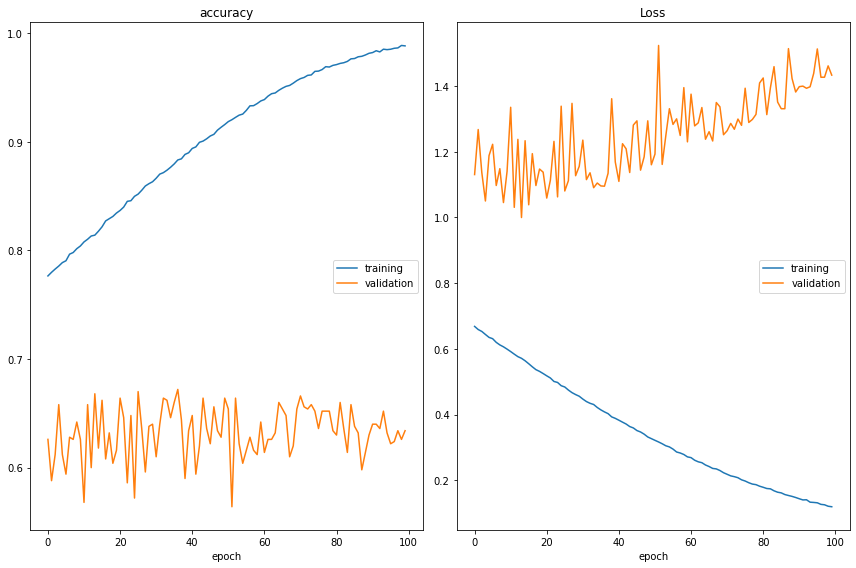

accuracy
	training         	 (min:    0.776, max:    0.989, cur:    0.988)
	validation       	 (min:    0.564, max:    0.672, cur:    0.634)
Loss
	training         	 (min:    0.120, max:    0.669, cur:    0.120)
	validation       	 (min:    1.000, max:    1.523, cur:    1.433)


In [ ]:
model_conv.fit(augmented_train_dataset, validation_data=val_dataset, epochs=100, callbacks=[PlotLossesKeras()], verbose=False)

In [11]:
input_shape = train_images.shape[-3:]
print(input_shape)

inputs = tf.keras.layers.Input(shape=input_shape, name='img')
x1 = tf.keras.layers.Conv2D(64, 3, activation='relu')(inputs)
# x4 = tf.keras.layers.Conv2D(64, 3, activation='relu')(x1)
x3 = tf.keras.layers.MaxPooling2D(3)(x1)
x2 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x3)
# x4 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(x2)
skip = tf.keras.layers.add([x2, x3])
x = tf.keras.layers.Flatten()(skip)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)

outputs = tf.keras.layers.Dense(10, activation='relu')(x)
model_skip = tf.keras.Model(inputs, outputs)

(32, 32, 3)


In [12]:
model_skip.compile(
    optimizer='sgd',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])
model_skip.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 30, 30, 64)   1792        ['img[0][0]']                    
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 10, 10, 64)  0           ['conv2d_2[0][0]']               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 10, 10, 64)   36928       ['max_pooling2d_1[0][0]']        
                                                                                            

In [ ]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

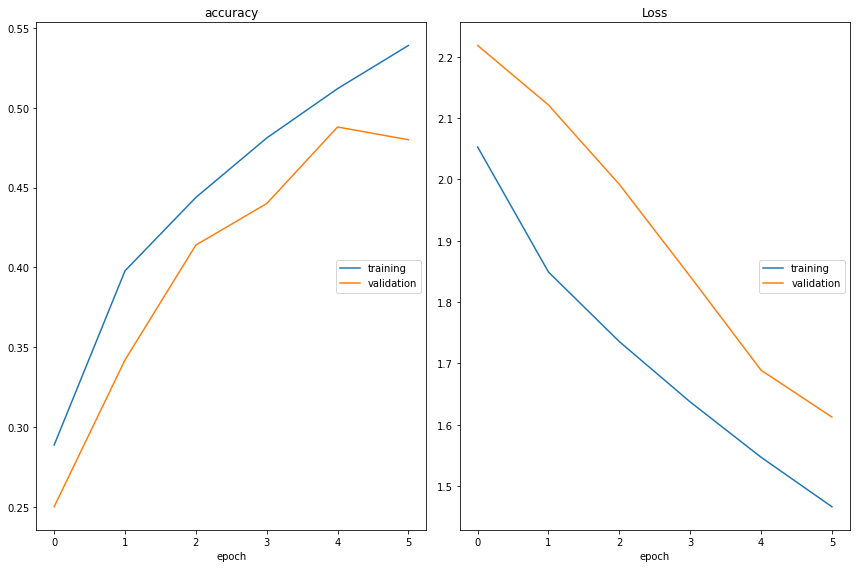

accuracy
	training         	 (min:    0.289, max:    0.539, cur:    0.539)
	validation       	 (min:    0.250, max:    0.488, cur:    0.480)
Loss
	training         	 (min:    1.466, max:    2.053, cur:    1.466)
	validation       	 (min:    1.613, max:    2.218, cur:    1.613)


In [ ]:
model_skip.fit(augmented_train_dataset, validation_data=val_dataset, epochs=100, callbacks=[PlotLossesKeras()], verbose=False)